# Assignment 6

## Part 2: Data Pre-Processing

2. Load required libraries

In [48]:
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
dset = xr.open_dataset('data/download.nc')

3. Converting air temprature from K to C and precipitation from m/h to mm/s

In [67]:
t2m = t2m - 273.15
tp = tp * 1000

4. Location of Wadi Murwani reservoir

In [21]:
specific_latitude = 22.177223
specific_longitude = 39.579280
selected_location = dset.sel(latitude=specific_latitude, longitude=specific_longitude, method='nearest')

5. Plot data

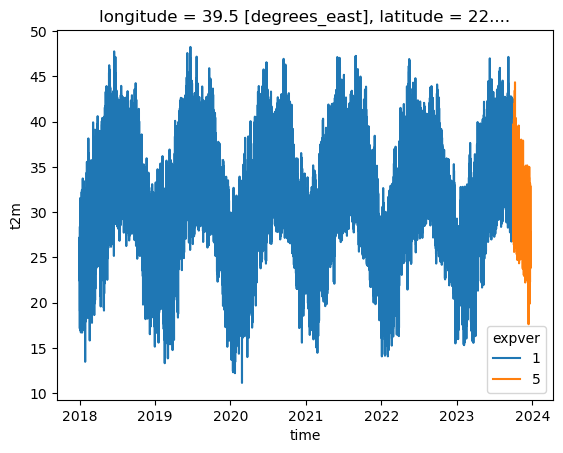

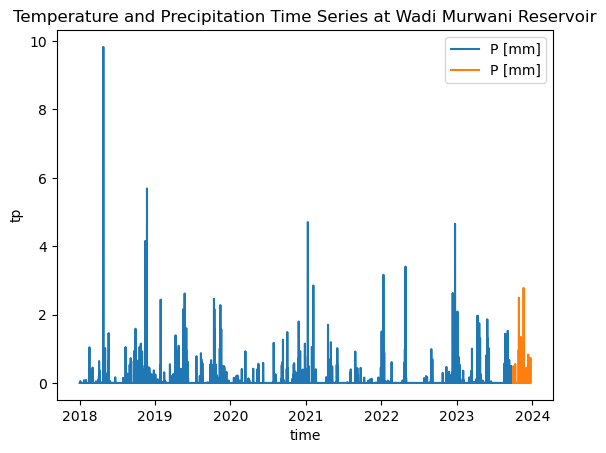

In [36]:
selected_location['t2m'].plot.line(x='time', label='T [°C]')
plt.show()
selected_location['tp'].plot.line(x='time', label='P [mm]')
plt.title('Temperature and Precipitation Time Series at Wadi Murwani Reservoir')
plt.legend()
plt.show()


8. The average annual precipitation is given by:

In [86]:
annual_precip = dset['tp'].resample(time='YE').mean()
mean_annual_prep = (annual_precip[:,0,0,0].values*1000).mean()
print(f'average precipitation for each of the 6 years \
from 2018 to 2024 are respectively:{(annual_precip[:,0,0,0].values)*1000}\
and the average for all years is {mean_annual_prep}')

TypeError: NDFrame.resample() got an unexpected keyword argument 'time'

8. There is a clear seasonal trend in the temperature, where each year the temperature increases during the summer months. As for the precipitation, no clear trends/patterns are observed in the graph.

9. 
* Temperature: Studies suggest ERA5 captures both mean and extreme temperatures very well, particularly in temperate regions. However, some discrepancies might exist in tropical regions compared to land measurements.
* Precipitation: While generally reliable, ERA5 precipitation data can exhibit larger uncertainties compared to temperature data, especially for convective precipitation (sudden, short-lived bursts) and in complex terrain.

Therefore, one might not necessarily be more reliable than the other, but their level of reliability can vary depending on factors like region, time scale and specific application.

## Part 3: Calculation of Potential Evaporation

In [39]:
tmin = dset['t2m'].resample(time='D').min().values
tmax = dset['t2m'].resample(time='D').max().values
tmean = dset['t2m'].resample(time='D').mean().values
lat = 21.25
doy = (dset['t2m'].resample(time='D').mean().time).dt.dayofyear.values

2. Computing the Potential Evaporation (PE)

In [40]:
import tools
pe = tools.hargreaves_samani_1982(tmin, tmax, tmean, lat, doy)[:,0,0,0]

t_ = dset['time'].resample(time='D').first()

3. Plotting PE over years

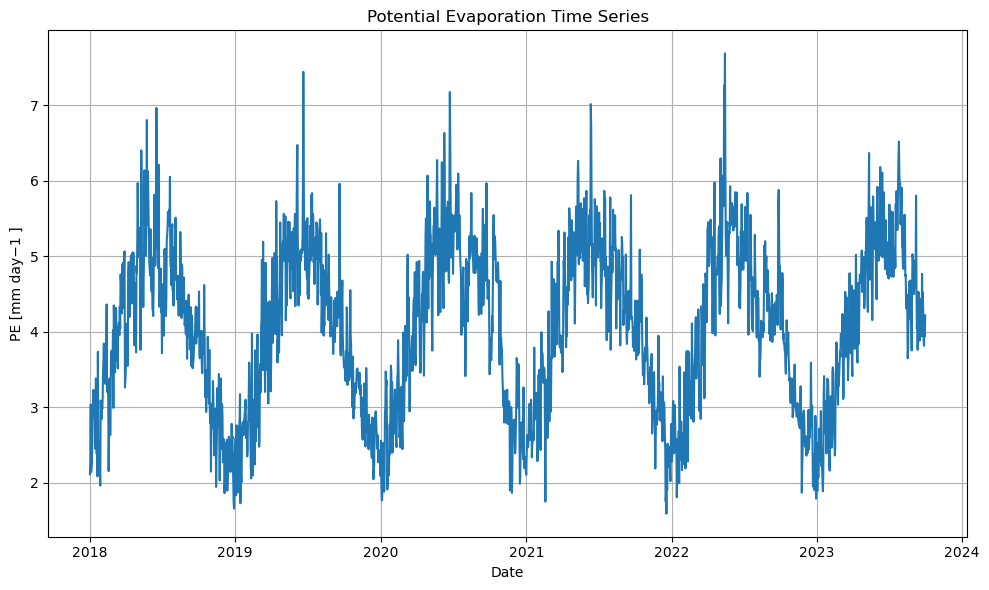

In [41]:
time_index = pd.to_datetime(t_)
plt.figure(figsize=(10, 6), tight_layout=True)
plt.plot(time_index, pe, label='Potential Evaporation')
plt.xlabel('Date')
plt.ylabel('PE [mm day−1 ]')
plt.title('Potential Evaporation Time Series')
plt.grid(True)

4. Annual PE

In [42]:
pe_series = pd.Series(pe, index=time_index)
annual_mean_pe = pe_series.resample('YE').mean()
mean_annual_pe = annual_mean_pe.mean()
print(f'The annual PE is {mean_annual_pe}')

The annual PE is 4.06036901473999


5. If we subtract the mean annual precipitation from mean annual PE we obtain the water column height potentially lost from the reservoir through evaporation annually: 

In [43]:
print(f'{(mean_annual_pe - mean_annual_prep)*6}  mm')

24.328702926635742  mm


if we multiply this value by an area of 1.6 km, we have the approximate total volume lost:

In [45]:
print(f'{(mean_annual_pe - mean_annual_prep) * 1.6 *1e12} mm^3' )
print(f'{(mean_annual_pe - mean_annual_prep) * 1.6 *1e3} m^3' )

6487654113769.531 mm^3
6487.654113769531 m^3


6. Evaporation from open water bodies is generally higher than from grass surfaces due to several key factors. Open water provides an unlimited water source for evaporation, presents a large, unobstructed surface area to the atmosphere, and absorbs more solar radiation due to its lower albedo, all of which contribute to higher evaporation rates. Although vegetated areas can exhibit significant evapotranspiration, the direct evaporation from open water still tends to be greater, enhanced by factors such as increased wind speed over water surfaces. This difference is mainly attributed to the constant availability of water and the physical characteristics of open water bodies compared to grassy or vegetated lands.

7. The estimate could be slightly underestimated, as this polygon shows, the area might go up 2 $km^2$ 

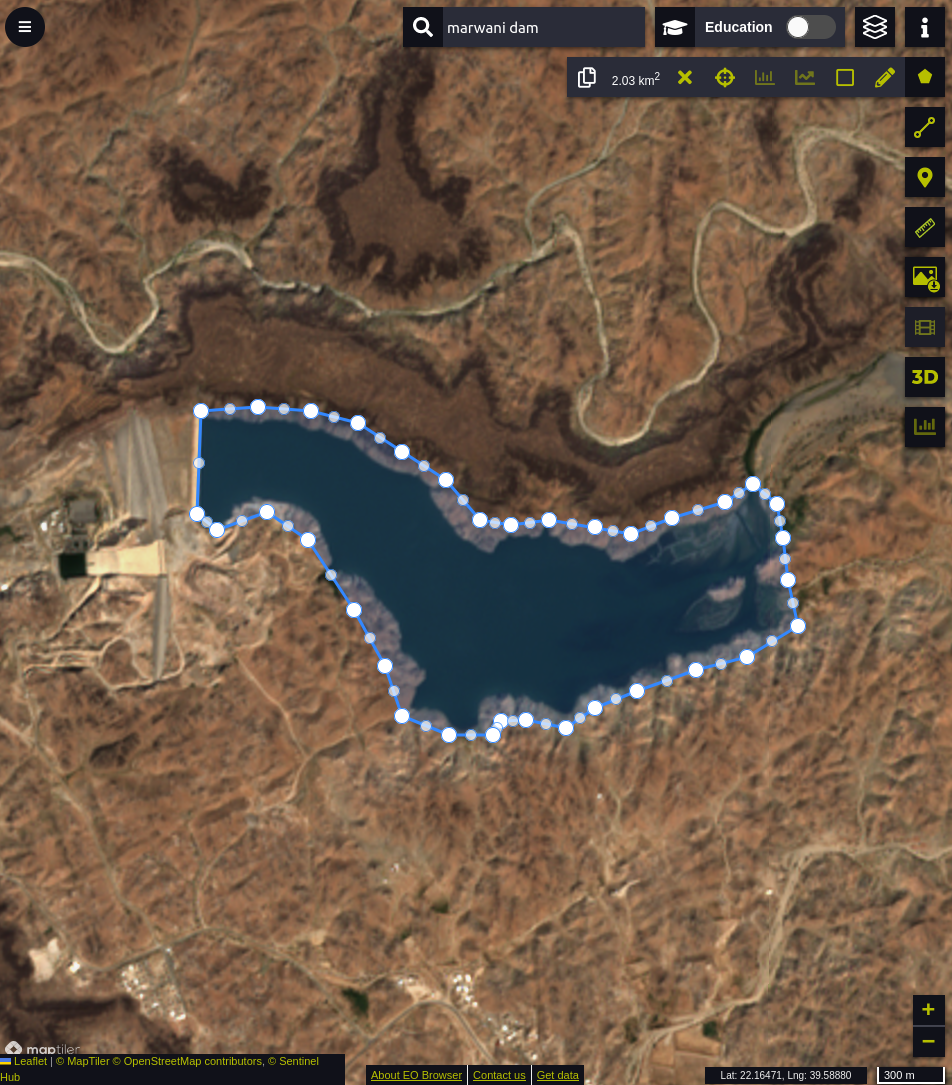

In [147]:
from IPython.display import display, Image
image_path = 'data/area_dam.png'
display(Image(filename=image_path))